### 머신러닝 모델 구축 - 캘리포니아 주택 가격 예측

In [28]:
# 1. 필요 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.datasets import fetch_california_housing  # 캘리포니아 주택 가격 예측 데이터


In [12]:
# 2. 데이터 핸들링
california_data = fetch_california_housing()
california_data


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [16]:
df = pd.DataFrame(
    data=california_data.data,
    columns=california_data.feature_names
)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [19]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


1. MedInc: 중위 소득
2. HouseAge: 주택 나이
3. AveRooms: 평균 방 개수
4. AveBedrms: 평균 침실 개수
5. Population: 인구 수
6. AveOccup: 평균 거주자 수
7. Latitude: 위도
8. Longitude: 경도

In [20]:
df = df.rename(
    columns={
        'MedInc': '중위 소득',
        'HouseAge': '주택 나이',
        'AveRooms': '평균 방 개수',
        'AveBedrms': '평균 침실 개수',
        'Population': '인구 수',
        'AveOccup': '평균 거주자 수',
        'Latitude': '위도',
        'Longitude': '경도'
    }
)
df

,중위 소득,주택 나이,평균 방 개수,평균 침실 개수,인구 수,평균 거주자 수,위도,경도
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


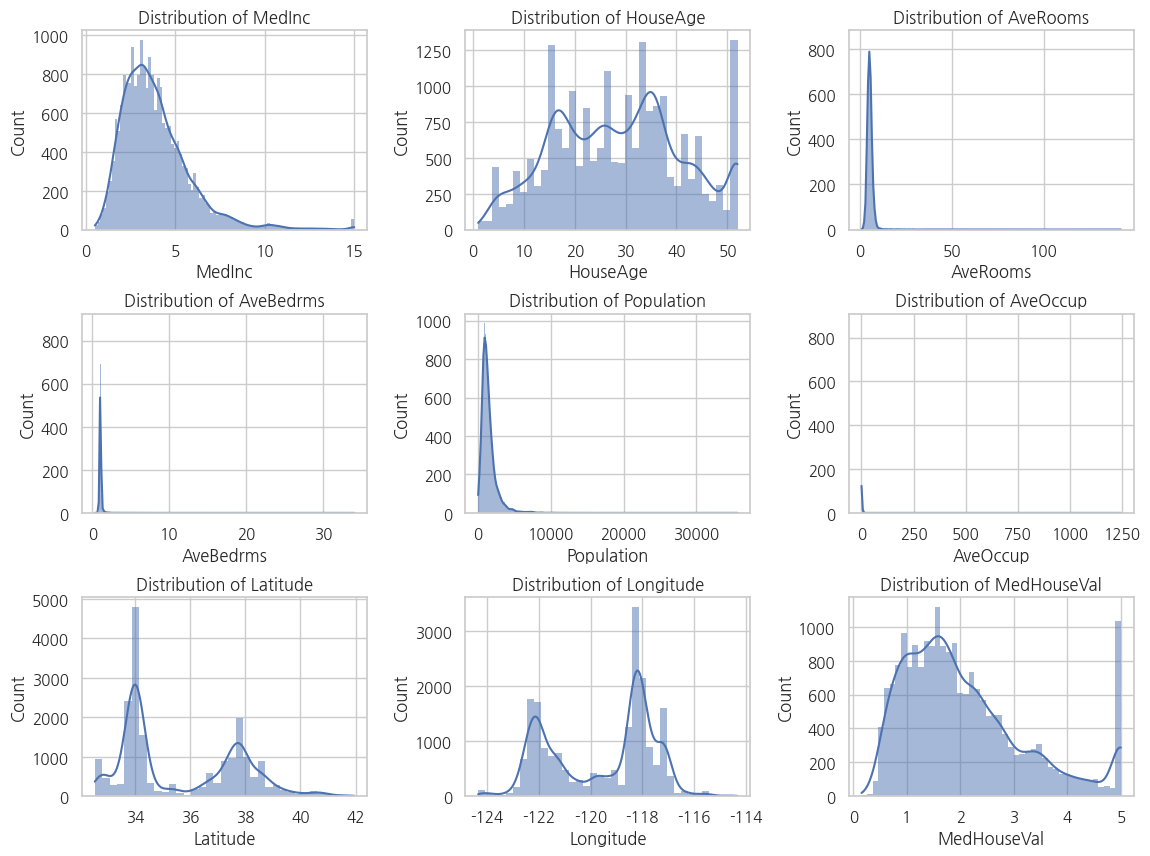

In [70]:
# 3. 시각화
sns.set_theme(style="whitegrid", font='NanumGothic')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
# print(axes)
fig.tight_layout(pad=3.0) 

for i, col in enumerate(df.columns):
    ax = axes[i//3, i%3]
    sns.histplot(
        data=df[col],
        kde=True,
        # stat="density",
        linewidth=0,
        ax=ax
    )
    ax.set_title(f'Distribution of {col}')

plt.show()



In [71]:
# 4. 상관관계 시각화
correlation_matrix = df.corr().round(2)
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
MedHouseVal,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


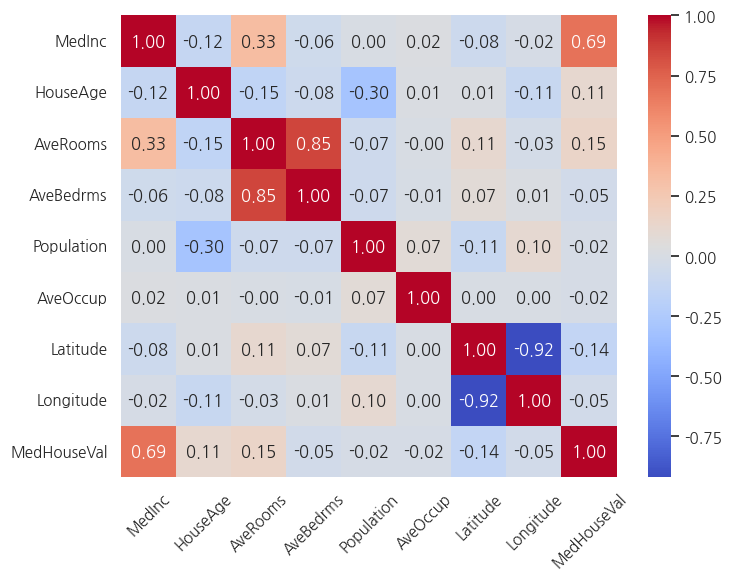

In [72]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.xticks(rotation=45)
plt.show()

In [73]:
# 5. 머신러닝 학습 - 데이터 분할
from sklearn.model_selection import train_test_split  # 데이터 분할
df = pd.DataFrame(
    data=california_data.data,
    columns=california_data.feature_names
)
df['MedHouseVal'] = california_data.target

df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [74]:
X = df.drop("MedHouseVal", axis=1)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [75]:
Y = df["MedHouseVal"]
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [84]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20025,1.7756,21.0,4.904762,1.037698,1238.0,2.456349,36.07,-119.05
10772,5.5422,32.0,5.123596,1.029963,1279.0,2.395131,33.66,-117.89
16691,2.7301,16.0,4.894437,1.028531,1777.0,2.534950,35.13,-120.61
11946,2.4922,31.0,5.011811,1.031496,686.0,2.700787,33.93,-117.43
6532,3.2900,32.0,4.281675,1.020942,3775.0,3.952880,34.07,-118.08


In [85]:
# 모듈 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 학습하기
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [87]:
pred = lr.predict(X_test)  # 예측값

# 모델 평가하기
mse_loss = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(mse_loss, r2)

0.5304460892018744 0.6057872925695522


In [88]:
# 오버피팅된 경우
pred = lr.predict(X_train)  # 예측값

# 모델 평가하기
mse_loss = mean_squared_error(y_train, pred)
r2 = r2_score(y_train, pred)
print(mse_loss, r2)

0.5229180518054783 0.6061334059992143
